### Polynomial Regression on Boston Housing Dataset (Thamo, please change all of this cell. I stole it from someone)
#### In this notebook we do a comparative study of Linear Regression and Polynomial Regression accuracy on the Boston Housing Dataset

This data was originally a part of UCI Machine Learning Repository and has been removed now. This data also ships with the scikit-learn library. There are 506 samples and 13 feature variables in this data-set. The objective is to predict the value of prices of the house using the given features.

The description of all the features is given below:

CRIM: Per capita crime rate by town

ZN: Proportion of residential land zoned for lots over 25,000 sq. ft

INDUS: Proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: Nitric oxide concentration (parts per 10 million)

RM: Average number of rooms per dwelling

AGE: Proportion of owner-occupied units built prior to 1940

DIS: Weighted distances to five Boston employment centers

RAD: Index of accessibility to radial highways

TAX: Full-value property tax rate per $10,000

B: 1000(Bk - 0.63)², where Bk is the proportion of [people of African American descent] by town

LSTAT: Percentage of lower status of the population

MEDV: Median value of owner-occupied homes in $1000s

#### Import the required Libraries

In [58]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd  
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# reading the model data 
df = pd.read_csv('tests.csv')



In [3]:
# visualize the head to check if the import worked
df.head()

,Unnamed: 0,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,0,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,22190.0
1,1,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,53800.0
2,2,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,18000.0
3,3,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,60400.0
4,4,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,51000.0


In [4]:
# drop unnecessary columns
df = df.drop(['Unnamed: 0', 'date', 'lat', 'long', 'waterfront', 'view', 'yr_built', 'zipcode', 'sqft_living15', 'sqft_lot15'], axis = 1) 

***
### Linear regression model
***
#### Prepare the data for training

In [5]:
# defining the variables which will enter the model for simple linear regression

y = df['price'] # define y as price, the variable that will be predicted

X = df.drop(['price'], axis=1) # by dropping price, input variables are selected


#### Split the data into training and testing sets

In [6]:
# splits the training and test data set in 80% : 20%
# assign random_state to any value.This ensures consistency.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12958, 10)
(8639, 10)
(12958,)
(8639,)


#### Perform the prediction with the linear regression model

In [7]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [8]:
#This is the result equation's intercept (the constant)
lin_model.intercept_

-79829.05812131878

In [9]:
#These are estimated coefficients 
lin_model.coef_

array([-3.76688583e+03, -2.10214763e+03,  1.38262414e+01, -2.11494011e-02,
       -1.94267414e+02,  6.09614857e+03,  1.18261578e+04,  4.35390812e+00,
        9.47233324e+00,  9.09237339e+00])

In [12]:
# A predicition array is presented
predictions  = lin_model.predict(X_test)
predictions

array([ 35527.76537442, 190453.26210862, 124393.5750316 , ...,
        22621.09483911,  38448.41054045,  81511.99346946])

In [13]:
#This is the r2 score
r2 = r2_score(y_test, predictions)
r2

0.5803873091544152

In [14]:
#This is the RMSE
import math 
mse = mean_squared_error(y_test, predictions)
rmse = math.sqrt(mse)
print(rmse)

25307.398142646933


#### Below the regression model's predictions are compared with the y_test values

C:\Users\kaypa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\kaypa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


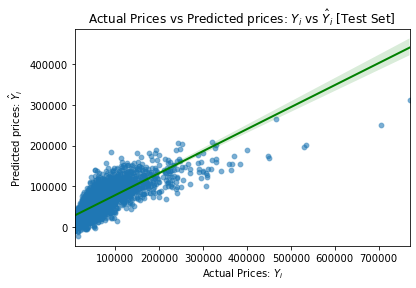

In [15]:
sns.scatterplot(y_test, predictions, alpha=0.4)
sns.regplot(y_test, predictions, truncate=True, scatter_kws={'s': 20, 'alpha':0.3}, line_kws={'color':'green', 'linewidth': 2})
 
plt.xlabel("Actual Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$ [Test Set]")
 
plt.show()


***
### Polynomial regression model
***

In this section, the model from the previous section is converted into a Polynomial model of order 2. After this, a regression model is run and predictions are obtained.


In [16]:
def create_polynomial_regression_model(degree):
  
  poly_features = PolynomialFeatures(degree=degree)
  
  # With this line of code, the previous's section model is transformed into higher features
  X_train_poly = poly_features.fit_transform(X_train)
  
  # The transformed features are fitted to a polinomial regression
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly, y_train)
  
  # A prediction on the training data set is conducted
  y_train_predicted = poly_model.predict(X_train_poly)
  
  # A prediciton on the test data set is carried out
  y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
  
  # The training dataset is evaluated
  rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
  r2_train = r2_score(y_train, y_train_predicted)
  
  # Model'S evaluation on the test data set
  rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
  r2_test = r2_score(y_test, y_test_predict)
  
  print("The model's performance for the training set")
  print("-------------------------------------------")
  print("Training set's RMSE is {}".format(rmse_train))
  print("Training set's R_2 score is {}".format(r2_train))
  
  print("\n")
  
  print("The model performance for the test set")
  print("-------------------------------------------")
  print("Testing set's RMSE is {}".format(rmse_test))
  print("Testing set's R_2 score is {}".format(r2_test))  
    
create_polynomial_regression_model(1)

The model's performance for the training set
-------------------------------------------
Training set's RMSE is 23235.147417349926
Training set's R_2 score is 0.5615747531392262


The model performance for the test set
-------------------------------------------
Testing set's RMSE is 25307.398142648228
Testing set's R_2 score is 0.5803873091543723


In [24]:
#These are the predicted values
degree=2
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_train_predicted = poly_model.predict(X_train_poly)
y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
y_test_predict 

array([ 36088.11913329, 282339.78470569, 128752.18867395, ...,
        28691.17300564,  37076.8678715 ,  75326.91602014])

In [25]:
#These are the data shapes
print(X_train_poly.shape)
print(y_train_predicted.shape)
print(y_test_predict.shape)


(12958, 66)
(12958,)
(8639,)


#### Below the polinomial model's predictions are compared with the y_test values

C:\Users\kaypa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\kaypa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


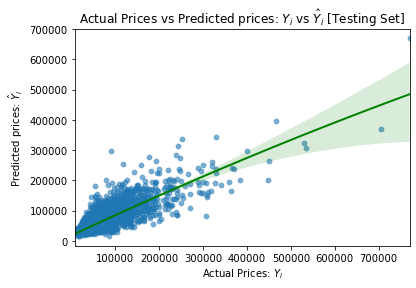

In [29]:
sns.scatterplot(y_test, y_test_predict, alpha=0.4)
sns.regplot(y_test, y_test_predict, scatter_kws={'s': 20, 'alpha':0.3}, line_kws={'color':'green', 'linewidth': 2}, order=2)
 
plt.xlabel("Actual Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$ [Testing Set]")
 
plt.show()

***
### K-nearest neighbors (KNN) model
***
In this section, the model speficied in the regression section is rerun through the K-nearest neighbors (KNN) model

#### This is a preliminary step towards the definition of a suitable k through the Elbow Method

In [31]:
# the cluster model is built and the distortion and inertia are calculated
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    # The model is built and fitted
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_


In [216]:
# Results for distortion are distorted

for key, val, in mapping1.items():
    print(f'{key}:{val}')

1:13974.38565509489
2:8860.79486023826
3:8126.716053215224
4:5793.596079008353
5:5212.93167543217
6:4506.258837696981
7:4458.270195900339
8:4355.492810245059
9:3620.126390828646


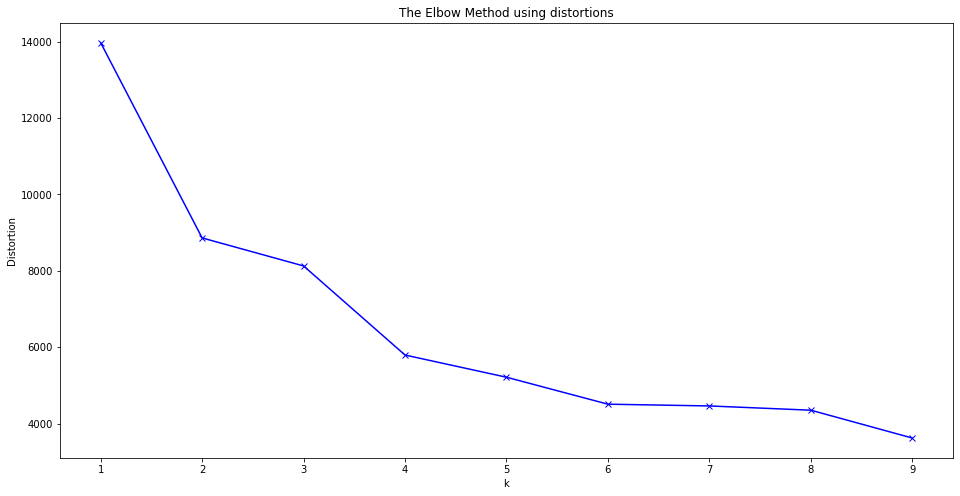

In [32]:
#These are the results for the elbow method using the distortions. The strange shape of the plot does not suggest any clear value for k.
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method using distortions')
plt.show()

In [33]:
# The results for the inertia are tabulated
for key, val in mapping2.items():
    print(f'{key}:{val}')

1:37077999995914.83
2:13903351970950.887
3:7180059054060.357
4:4467990203314.347
5:2588152218542.8633
6:1856013816671.5234
7:1401225695887.5867
8:1157544202453.7625
9:929833133077.7032


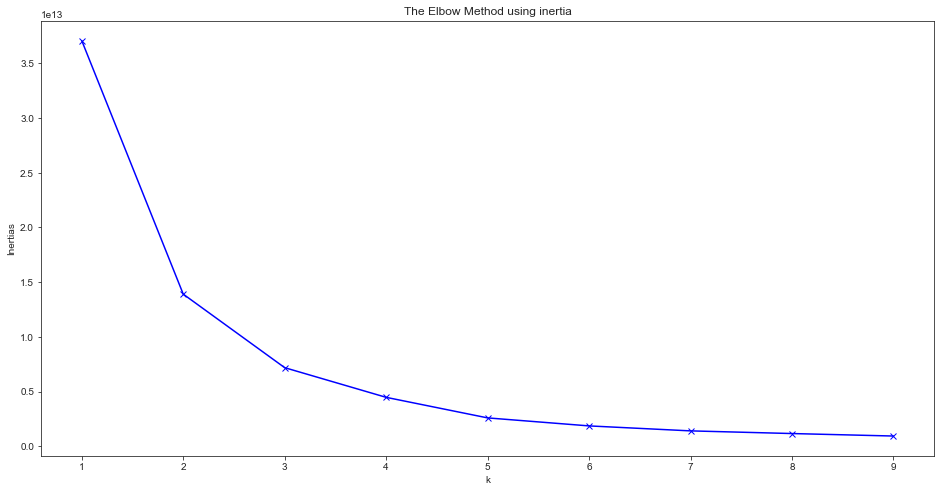

In [684]:
# These are the result using Inertia. Accordign to the Elbow Method, a value like 5 or 6 could be a suitable k.
plt.figure(figsize=(16,8))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertias')
plt.title('The Elbow Method using inertia')
plt.show()

#### Here the k-means clustering method is computed. The computed clusters have very similar properties. 

<function matplotlib.pyplot.show(close=None, block=None)>

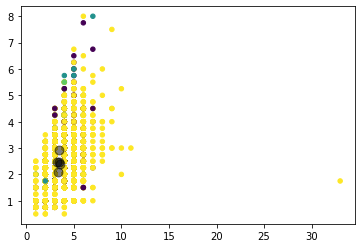

In [35]:
kmeanModel = KMeans(n_clusters=5).fit(X)
kmeanModel.fit(X)
y_kmeans=kmeanModel.predict(X)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmeans, s=20, cmap='viridis')
centers = kmeanModel.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=80, alpha=0.5)
plt.show

#### Below the method presented in class to present the plot is computed, using only the features "price", "sqft_living" and "grade"

In [49]:
def knn_comparison(data, k):
    x = data.iloc[:, 0:2].values
    y = data.iloc[:, -1].astype(int).values
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x, y)

    plt.figure(figsize=(16,12))
    plot_decision_regions(x, y, clf=knn)
    plt.title("Knn with K="+ str(k), fontsize = 18)
    plt.show()

In [50]:
new = pd.concat([X,y],axis=1)
new = new[['price','sqft_living', 'grade']].sample(n=100,random_state=100)
new.head()

,price,sqft_living,grade
7189,90000.0,1240,7
2751,34695.0,2040,8
17077,30500.0,860,6
15151,50700.0,2120,8
985,28300.0,2130,7


#### The plot is run with a k of 5. There is not really a discernible pattern.

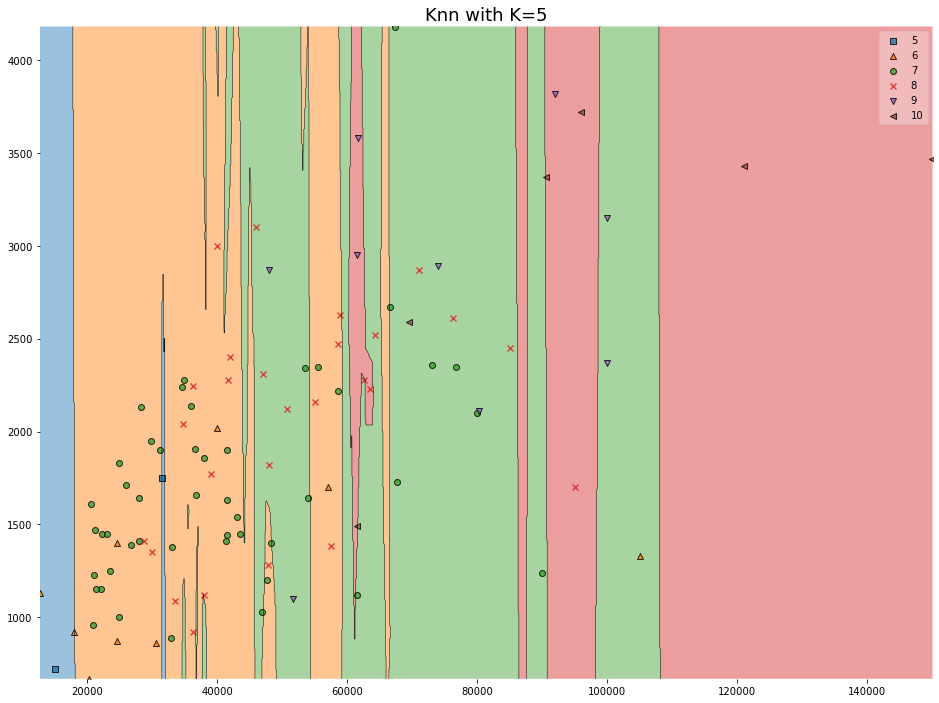

In [53]:
knn_comparison(new,5)

#### The model is now run, with a number of neighbors of 100

In [54]:
knnreg = KNeighborsRegressor(n_neighbors=100) 
knnreg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=100)

##### Here an array of predictions is presented

In [56]:
knn_predictions = knnreg.predict(X_test)
knn_predictions

array([ 41237.391, 153332.6  ,  98163.51 , ...,  41509.435,  42674.442,
        81446.692])

#### These are the test statistics of the model. Notice that the R2 is lower than the linear regression case. What also stands out is the very high value of the RMSE. The cost of using the KNN model may be a much higher variance, which possibly permits to achieve a lower bias.

In [59]:
MAE = mean_absolute_error(y_test,knn_predictions)
MSE = mean_squared_error(y_test,knn_predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,knn_predictions)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is: 16587.46
The mean squared error of the model in the test set is: 849785897.85
The root mean squared error of the model in the test set is: 29151.09
The R2 of the model in the test set is: 0.44


#### The plot below compares y_test values with predictions made by the KNN algorithm. It can be seen that the predictions are reasonably in line with the linear regression's results.

C:\Users\kaypa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

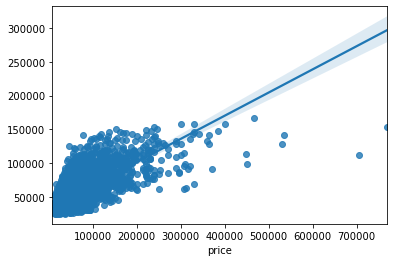

In [60]:
sns.regplot(y_test, knn_predictions)



#### This code permits to visualize different combinations of inputs and results from the KNN model for different values of K. It also permits to assess their accuracies.

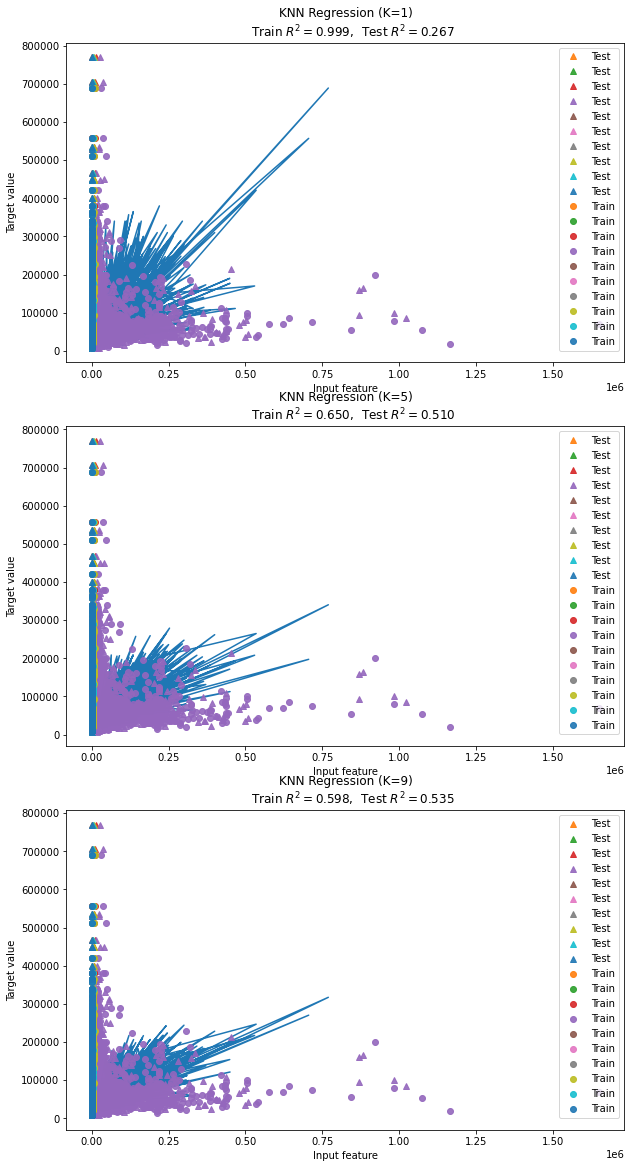

In [61]:
def plot_regression_model_complexity():
    fig, subaxes = plt.subplots(3, 1, figsize=(10,20))
    X_predict_input = np.linspace(-3, 3, 500).reshape(-1,1)
    for thisaxis, K in zip(subaxes, [1, 5, 9]):
        knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
        knn_predictions = knnreg.predict(X_test)       
        train_score = knnreg.score(X_train, y_train)
        test_score = knnreg.score(X_test, y_test)
        thisaxis.plot(y_test, knn_predictions)
        thisaxis.plot(X_test, y_test, '^', alpha=0.9, label='Test')
        thisaxis.plot(X_train, y_train, 'o', alpha=0.9, label='Train')
        thisaxis.set_xlabel('Input feature')
        thisaxis.set_ylabel('Target value')
        thisaxis.set_title('KNN Regression (K={})\n\
    Train $R^2 = {:.3f}$,  Test $R^2 = {:.3f}$'
                          .format(K, train_score, test_score))
        thisaxis.legend()
        figsize=(60,20)
plot_regression_model_complexity()